# Instalando os requisitos

In [ ]:
!pip install pdfplumber
import pdfplumber
import nltk 
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')

# Criando a função

In [2]:
def NuvemDePalavras(cv, salvar = True):
   
    arquivoPDF = pdfplumber.open(cv)
    primeira_pagina = arquivoPDF.pages[0]
    textoCRU = primeira_pagina.extract_text()
    

    lista_de_palavras = nltk.tokenize.word_tokenize(textoCRU)
    lista_de_palavras = [palavra.lower() for palavra in lista_de_palavras]
    stop_words = nltk.corpus.stopwords.words('portuguese')
    pontuacao = ['(',')',';',':','[',']',',','–','(',')','/','|','-','%','@']
    keywords = [palavra for palavra in lista_de_palavras if not palavra in stop_words and not palavra in pontuacao]
    textocv = " ".join(s for s in keywords)


    wordcloud = WordCloud(background_color = '#0f54c9', 
                          max_font_size = 150, 
                          width = 1280, 
                          height = 720, 
                          colormap= 'Blues').generate(textocv) 
 
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.imshow(wordcloud)
    ax.set_axis_off()
    plt.imshow(wordcloud)

    if salvar:
        wordcloud.to_file("mywordcloud.png")

    plt.show()

# Inserindo o arquivo a ser analisado

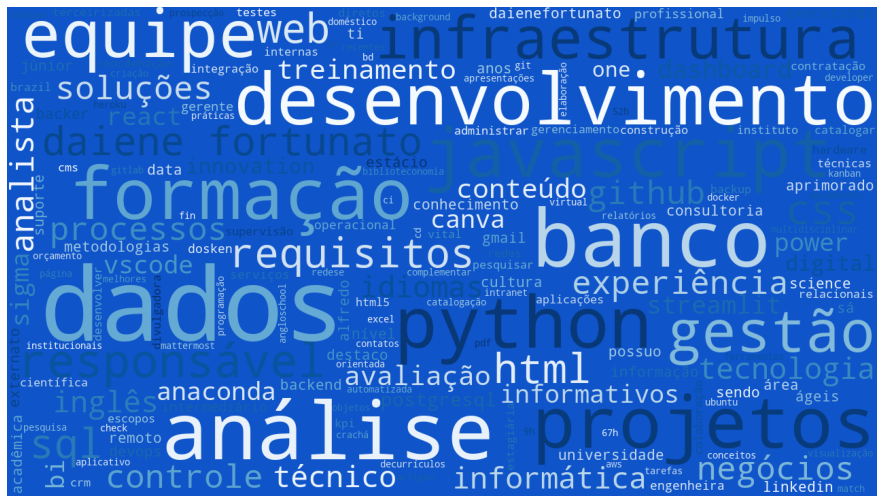

In [5]:
NuvemDePalavras('caminho\arquivo.pdf')